In [17]:
import pandas as pd
import numpy as np
import os
import tensorflow as tf
!%matplotlib inline
import matplotlib.pyplot as plt
import re

/usr/bin/sh: line 0: fg: no job control


In [38]:
with open("./datasets/Sentiment-Analysis-Dataset/SentimentAnalysisDataset.csv") as f:
    x = f.readlines()
        
x[4286]


'4286,0,Kaggle,""" Brokeback Mountain "" is tragic, but immensely well-executed, never feeling moralistic."\n'

In [36]:
x = '4286,0,Kaggle,""" Brokeback Mountain "" is tragic, but immensely well-executed, never feeling moralistic."\n'
y = x.split(",")
z = " &&&&&& ".join(y[3:])
text = ",".join([y[0],y[1],y[2],z])
text

'4286,0,Kaggle,""" Brokeback Mountain "" is tragic &&&&&&  but immensely well-executed &&&&&&  never feeling moralistic."\n'

In [40]:
with open("./datasets/Sentiment-Analysis-Dataset/sentiment.csv", 'a') as file:
    for _ in x:
        y = _.split(",")
        z = " &&&&&& ".join(y[3:])
        text = ",".join([y[0],y[1],y[2],z])
        file.writelines(text)

In [55]:
# pd.options.display.max_colwidth = 500
# df = pd.read_csv("sentiment.csv", quotechar='"')
df = df[['SentimentText', 'Sentiment']]
df

,SentimentText,Sentiment
0,is so sad for my APL friend.............,0
1,I missed the New Moon trailer...,0
2,omg its already 7:30 :O,1
3,.. Omgaga. Im sooo im gunna CRy. I've been at this dentist since 11.. I was suposed 2 just get a crown put on (30mins)...,0
4,i think mi bf is cheating on me!!! T_T,0
5,or i just worry too much?,0
6,Juuuuuuuuuuuuuuuuussssst Chillin!!,1
7,Sunny Again Work Tomorrow :-| TV Tonight,0
8,handed in my uniform today . i miss you already,1
9,hmmmm.... i wonder how she my number @-),1


In [88]:
z = 'Zzzz... Fuck Ã¼ : Zzzz... Fuck Ã¼  http://bit.ly/1a8JxZ'
z

'Zzzz... Fuck Ã¼ : Zzzz... Fuck Ã¼  http://bit.ly/1a8JxZ'

In [79]:
pattern = "(https?:\/\/(?:www\.|(?!www))[a-zA-Z0-9][a-zA-Z0-9-]+[a-zA-Z0-9]\.[^\s]{2,}|www\.[a-zA-Z0-9][a-zA-Z0-9-]+[a-zA-Z0-9]\.[^\s]{2,}|https?:\/\/(?:www\.|(?!www))[a-zA-Z0-9]+\.[^\s]{2,}|www\.[a-zA-Z0-9]+\.[^\s]{2,})"
z = re.sub(pattern,"",z )
z

'Zzzz... Fuck Ã¼ : Zzzz... Fuck Ã¼  '

In [52]:
import unicodedata
def unicode_to_ascii(s):
    return ''.join(c for c in unicodedata.normalize('NFD', s)
        if unicodedata.category(c) != 'Mn')
# z = unicode_to_ascii(z)

In [89]:
pattern = "(https?:\/\/(?:www\.|(?!www))[a-zA-Z0-9][a-zA-Z0-9-]+[a-zA-Z0-9]\.[^\s]{2,}|www\.[a-zA-Z0-9][a-zA-Z0-9-]+[a-zA-Z0-9]\.[^\s]{2,}|https?:\/\/(?:www\.|(?!www))[a-zA-Z0-9]+\.[^\s]{2,}|www\.[a-zA-Z0-9]+\.[^\s]{2,})"


'Z Fuck Z Fuck '

In [53]:
def preprocess_text(z):
    pattern = "(https?:\/\/(?:www\.|(?!www))[a-zA-Z0-9][a-zA-Z0-9-]+[a-zA-Z0-9]\.[^\s]{2,}|www\.[a-zA-Z0-9][a-zA-Z0-9-]+[a-zA-Z0-9]\.[^\s]{2,}|https?:\/\/(?:www\.|(?!www))[a-zA-Z0-9]+\.[^\s]{2,}|www\.[a-zA-Z0-9]+\.[^\s]{2,})"
    z = unicode_to_ascii(z)
    z = re.sub(pattern,"",z )
    z = re.sub(r"(.)\1{2,}"," ",z)
    z = re.sub(r'[" "]+', " ", z)
    z = re.sub(r"[^a-zA-Z]+"," ", z)
    
    return z.lower()

In [54]:
df['SentimentText'] = df.apply(lambda x: preprocess_text(x['SentimentText']), axis=1)
df.head()

,Unnamed: 0,SentimentText,Sentiment,len
0,0,is so sad for my apl friend,0,29
1,1,i missed the new moon trailer,0,31
2,2,omg its already o,1,18
3,3,omgaga im s im gunna cry i ve been at this de...,0,109
4,4,i think mi bf is cheating on me t t,0,36


In [55]:
df.to_csv("./datasets/Sentiment-Analysis-Dataset/all_df_preprocessed.csv")

In [18]:
df = pd.read_csv("./datasets/Sentiment-Analysis-Dataset/all_df_preprocessed.csv")
df.head()

,Unnamed: 0,SentimentText,Sentiment,len
0,0,is so sad for my APL friend,0,29
1,1,I missed the New Moon trailer,0,31
2,2,omg its already O,1,18
3,3,.. Omgaga. Im s im gunna CRy. I ve been at th...,0,109
4,4,i think mi bf is cheating on me T T,0,36


In [47]:
"hvFFH".lower()

'hvffh'

In [73]:
text, sentiment = df.SentimentText.to_list(), df.Sentiment.to_list()
len(text),len(sentiment)

vocab_size = 5000
max_length = 50
BATCH_SIZE = 256
EMBEDDING_SIZE = 64
EPOCHS = 10

tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=vocab_size )
tokenizer.fit_on_texts(text)
text_seq = tokenizer.texts_to_sequences(text)

padded_text_seq = tf.keras.preprocessing.sequence.pad_sequences(text_seq, maxlen=max_length,truncating='post',
                                                                padding='post')
padded_text_seq.shape

from sklearn.model_selection import train_test_split
train_text,test_text, train_sentiment, test_sentiment = train_test_split(padded_text_seq,sentiment, test_size = 0.1,
                                                                        random_state = 2)
len(train_text),len(test_text), len(train_sentiment), len(test_sentiment)

text_train, text_val, sentiment_train, sentiment_val = train_test_split(train_text, train_sentiment,
                                                                       test_size = 0.2, random_state = 2)
len(text_train), len(text_val), len(sentiment_train), len(sentiment_val)



(1136601, 284151, 1136601, 284151)

In [74]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Embedding(input_dim=vocab_size, output_dim=EMBEDDING_SIZE, input_length=max_length))
model.add(tf.keras.layers.Conv1D(64,3,activation='relu'))
model.add(tf.keras.layers.MaxPool1D())
model.add(tf.keras.layers.CuDNNLSTM(100))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_7 (Embedding)      (None, 50, 64)            320000    
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 48, 64)            12352     
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 24, 64)            0         
_________________________________________________________________
cu_dnnlstm_7 (CuDNNLSTM)     (None, 100)               66400     
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 101       
Total params: 398,853
Trainable params: 398,853
Non-trainable params: 0
_________________________________________________________________


In [75]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [76]:
model.fit(text_train, sentiment_train, batch_size=BATCH_SIZE, epochs=EPOCHS, validation_data=[text_val,sentiment_val])

Train on 1136601 samples, validate on 284151 samples
Epoch 1/10
1136601/1136601 [==============================] - 80s 70us/step - loss: 0.4299 - acc: 0.8003 - val_loss: 0.4052 - val_acc: 0.8137
Epoch 2/10
1136601/1136601 [==============================] - 80s 71us/step - loss: 0.3901 - acc: 0.8235 - val_loss: 0.3954 - val_acc: 0.8197
Epoch 3/10
1136601/1136601 [==============================] - 80s 71us/step - loss: 0.3712 - acc: 0.8338 - val_loss: 0.3940 - val_acc: 0.8205
Epoch 4/10
1136601/1136601 [==============================] - 81s 71us/step - loss: 0.3552 - acc: 0.8424 - val_loss: 0.3940 - val_acc: 0.8211
Epoch 5/10
1136601/1136601 [==============================] - 81s 71us/step - loss: 0.3408 - acc: 0.8502 - val_loss: 0.4045 - val_acc: 0.8189
Epoch 6/10
1136601/1136601 [==============================] - 81s 71us/step - loss: 0.3278 - acc: 0.8567 - val_loss: 0.4039 - val_acc: 0.8186
Epoch 7/10
1136601/1136601 [==============================] - 81s 71us/step - loss: 0.3161 - ac

In [138]:
model.save("lsentiment_lstm.h5")

In [140]:
x = model.history.history
x

{'val_loss': [0.4138306854344503,
  0.39856881464415106,
  0.39491012171020173,
  0.3912297253267191,
  0.3871754976170022,
  0.39286040530552613,
  0.4069620769350355,
  0.4132661476722543,
  0.42525011399304585,
  0.4388689802523469],
 'val_acc': [0.8102452569276606,
  0.8176849632813923,
  0.8209508324838993,
  0.8215596637047587,
  0.8250050149440646,
  0.8221473793907172,
  0.8219432625657179,
  0.819064511478938,
  0.8180967161874176,
  0.8156684298189699],
 'loss': [0.4558598811843597,
  0.3991642203513623,
  0.3821439959312898,
  0.36940870898988226,
  0.3564440264469097,
  0.3434655615357822,
  0.3270012502198628,
  0.30925218732579557,
  0.2910424167253167,
  0.27379080348785567],
 'acc': [0.7765363570854698,
  0.8178613251257258,
  0.8273017532116774,
  0.833860783157883,
  0.8406934359539965,
  0.8478876932169099,
  0.8562837794419996,
  0.8652033563207812,
  0.8742188331683969,
  0.8826897037737841]}

In [144]:
import json
with open("model_dict.json", 'w') as f:
    json.dump(json.dumps(x),f)

In [142]:
json.dumps(x)

'{"val_loss": [0.4138306854344503, 0.39856881464415106, 0.39491012171020173, 0.3912297253267191, 0.3871754976170022, 0.39286040530552613, 0.4069620769350355, 0.4132661476722543, 0.42525011399304585, 0.4388689802523469], "val_acc": [0.8102452569276606, 0.8176849632813923, 0.8209508324838993, 0.8215596637047587, 0.8250050149440646, 0.8221473793907172, 0.8219432625657179, 0.819064511478938, 0.8180967161874176, 0.8156684298189699], "loss": [0.4558598811843597, 0.3991642203513623, 0.3821439959312898, 0.36940870898988226, 0.3564440264469097, 0.3434655615357822, 0.3270012502198628, 0.30925218732579557, 0.2910424167253167, 0.27379080348785567], "acc": [0.7765363570854698, 0.8178613251257258, 0.8273017532116774, 0.833860783157883, 0.8406934359539965, 0.8478876932169099, 0.8562837794419996, 0.8652033563207812, 0.8742188331683969, 0.8826897037737841]}'

In [2]:
import json
with open("model_dict.json") as f:
    y = json.load(f)
y

'{"val_loss": [0.4138306854344503, 0.39856881464415106, 0.39491012171020173, 0.3912297253267191, 0.3871754976170022, 0.39286040530552613, 0.4069620769350355, 0.4132661476722543, 0.42525011399304585, 0.4388689802523469], "val_acc": [0.8102452569276606, 0.8176849632813923, 0.8209508324838993, 0.8215596637047587, 0.8250050149440646, 0.8221473793907172, 0.8219432625657179, 0.819064511478938, 0.8180967161874176, 0.8156684298189699], "loss": [0.4558598811843597, 0.3991642203513623, 0.3821439959312898, 0.36940870898988226, 0.3564440264469097, 0.3434655615357822, 0.3270012502198628, 0.30925218732579557, 0.2910424167253167, 0.27379080348785567], "acc": [0.7765363570854698, 0.8178613251257258, 0.8273017532116774, 0.833860783157883, 0.8406934359539965, 0.8478876932169099, 0.8562837794419996, 0.8652033563207812, 0.8742188331683969, 0.8826897037737841]}'

In [3]:
z = json.loads(y)

In [10]:
list(z.keys())[0]

'val_loss'

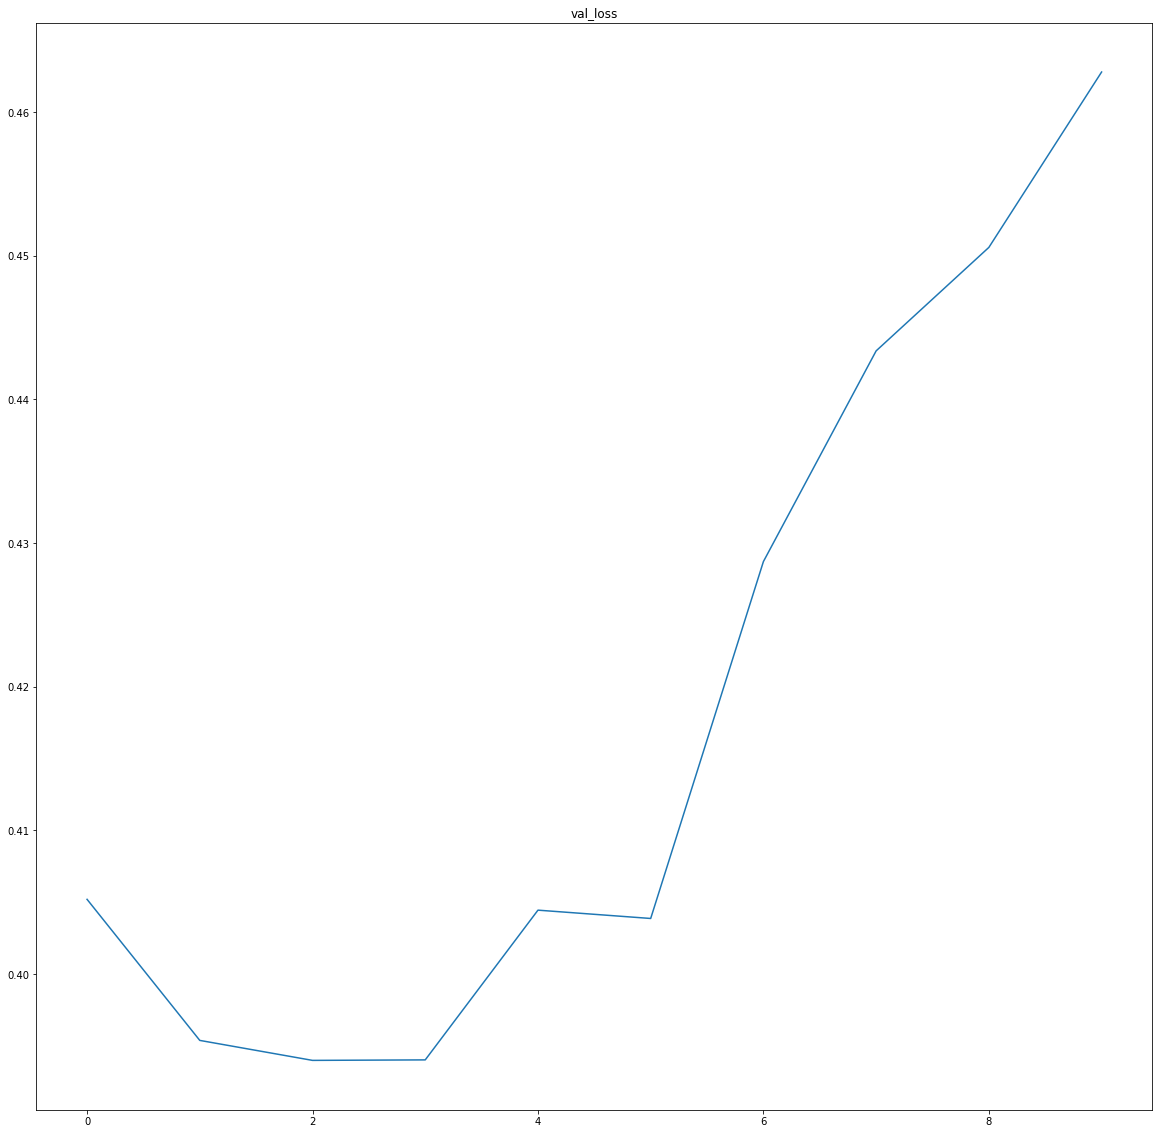

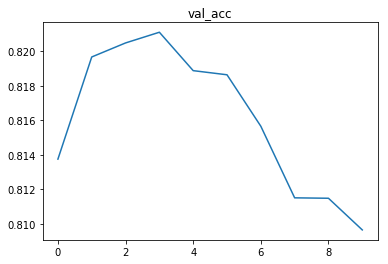

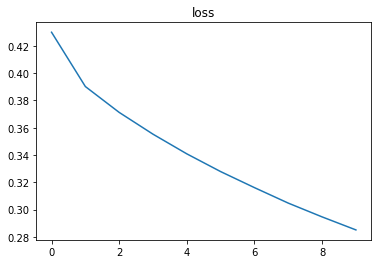

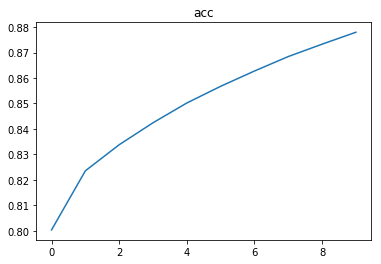

In [77]:
import matplotlib.pyplot as plt
y = list(model.history.history.keys())
plt.figure(figsize=(20,20))
for i in range(len(z)):
    plt.plot(model.history.history[y[i]])
    plt.title(y[i])
    plt.show()

In [20]:
with open("/text/rudra/glove_embedding/glove.6B.50d.txt") as f:
    x = f.readlines()


In [2]:
x[0]

'the 0.418 0.24968 -0.41242 0.1217 0.34527 -0.044457 -0.49688 -0.17862 -0.00066023 -0.6566 0.27843 -0.14767 -0.55677 0.14658 -0.0095095 0.011658 0.10204 -0.12792 -0.8443 -0.12181 -0.016801 -0.33279 -0.1552 -0.23131 -0.19181 -1.8823 -0.76746 0.099051 -0.42125 -0.19526 4.0071 -0.18594 -0.52287 -0.31681 0.00059213 0.0074449 0.17778 -0.15897 0.012041 -0.054223 -0.29871 -0.15749 -0.34758 -0.045637 -0.44251 0.18785 0.0027849 -0.18411 -0.11514 -0.78581\n'

In [5]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

In [21]:
import time
st = time.time()
token = []
label = []
for _ in x[:50000]:
    z = _.split()
    token.append(z[1:])
    label.append(z[0])

tsne = TSNE(perplexity=15, n_components=2, init='pca', random_state=2, n_iter=1000)
result = tsne.fit_transform(token)
print(time.time()-st)

677.9725155830383


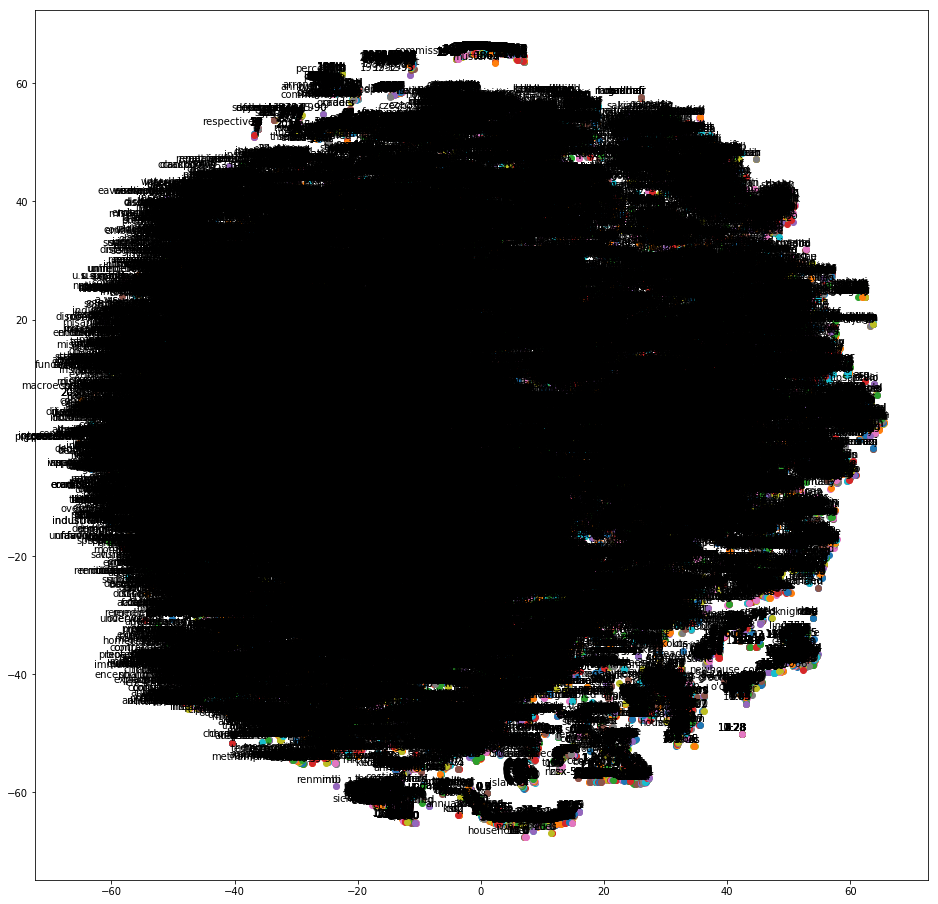

In [22]:
x = []
y = []
for _ in result:
    x.append(_[0])
    y.append(_[1])

plt.figure(figsize=(16,16))
for i in range(len(x)):
    plt.scatter(x[i],y[i])
    plt.annotate(label[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')